<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# Проект «Анализ вакансий из HeadHunter»
   

In [ ]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

# Параметры подключения (НЕ ДОЛЖНЫ БЫТЬ В КОДЕ)
DBNAME = ''  # Замените на ваше значение
USER = ''    # Замените на ваше значение
PASSWORD = ''  # Замените на ваше значение
HOST = ''    # Замените на ваше значение
PORT =       # Замените на ваше значение

def connect_to_db(dbname, user, password, host, port):
    """Подключается к базе данных и возвращает объект соединения."""
    try:
        connection = psycopg2.connect(
            dbname=dbname,
            user=user,
            host=host,
            password=password,
            port=port
        )
        return connection
    except psycopg2.Error as e:
        print(f"Ошибка подключения к базе данных: {e}")
        return None

# Подключение к базе данных
connection = connect_to_db(DBNAME, USER, PASSWORD, HOST, PORT)
if connection is None:
    exit()

# Создаем курсор
cursor = connection.cursor()


## 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в базе (вакансии находятся в таблице `vacancies`).

In [ ]:
# текст запроса vacancies (id, name, key_skills, schedule, experience, employment, salary_from, salary_to, area_id, emplpyer_id)
# Создаем курсор
cursor = connection.cursor()

# Выполняем запрос для подсчета вакансий
query = "SELECT COUNT(*) as vacancy_count FROM public.vacancies;"
cursor.execute(query)

# Получаем результат
result = cursor.fetchone()
vacancy_count = result[0]



In [ ]:
# результат запроса
print(f"Количество вакансий в базе: {vacancy_count}") # Выводим результат



Количество вакансий в базе: 49197


2. Напишите запрос, который посчитает количество работодателей (таблица `employers`).

In [ ]:
# текст запроса
query = "SELECT COUNT(*) FROM public.employers;"
cursor.execute(query)

# Получаем результат
employer_count = cursor.fetchone()[0]


In [ ]:
# результат запроса

print(f"Количество работодателей в базе: {employer_count}") # Выводим результат

Количество работодателей в базе: 23501


3. Посчитайте с помощью запроса количество регионов (таблица `areas`).

In [ ]:
# текст запроса Areas (id, name)
query = "SELECT COUNT(*) FROM public.areas;"
cursor.execute(query)

# Получаем результат
areas_count = cursor.fetchone()[0]


In [ ]:
# результат запроса
print(f"Количество регионов в базе: {areas_count}") # Выводим результат

Количество регионов в базе: 1362


4. Посчитайте с помощью запроса количество сфер деятельности в базе (таблица `industries`).

In [ ]:
# текст запроса Industries (id, name)
query = "SELECT COUNT(*) FROM public.industries;"
cursor.execute(query)

# Получаем результат
industries_count = cursor.fetchone()[0]



In [ ]:
# результат запроса
print(f"Количество сфер деятельности в базе: {industries_count}") # Выводим результат

Количество сфер деятельности в базе: 294


***

In [ ]:
# выводы по предварительному анализу данных
# Выполняем запрос для получения пятёрки лидеров по количеству вакансий в регионах
query = """
SELECT a.name, COUNT(v.id)
FROM public.areas a
LEFT JOIN public.vacancies v ON a.id = v.area_id
GROUP BY a.id, a.name
ORDER BY COUNT(v.id) DESC
LIMIT 5;
"""
cursor.execute(query)

# Получаем результаты
results = cursor.fetchall()

# Выводим результаты
print("Пятёрка лидеров по количеству вакансий:")
for area_name, cnt in results:
    print(f"Регион: {area_name}, Количество вакансий: {cnt}")


Пятёрка лидеров по количеству вакансий:
Регион: Москва, Количество вакансий: 5333
Регион: Санкт-Петербург, Количество вакансий: 2851
Регион: Минск, Количество вакансий: 2112
Регион: Новосибирск, Количество вакансий: 2006
Регион: Алматы, Количество вакансий: 1892


В ходе предварительного анализа данных были получены следующие результаты:
- Общее количество вакансий: В базе данных 49,197 вакансий. Это много, значит, есть много возможностей для соискателей.
- Количество работодателей: Зарегистрировано 23,501 работодателей. Это означает высокую конкуренцию среди компаний, что может привести к росту зарплат.
- Количество регионов: В базе 1,362 региона. Это показывает широкий охват вакансий по разным населенным пунктам.
- Количество сфер деятельности: Представлено 294 сферы. Это разнообразие позволяет специалистам найти подходящие вакансии.
- Пятёрка лидеров по количеству вакансий в регионах: Москва, Санкт-Петербург, Минск, Новосибирск и Алматы. Большинство вакансий в крупных городах.

Общий анализ: Рынок труда имеет большой потенциал. Много вакансий, разнообразие работодателей и сфер деятельности создают хорошие возможности для соискателей. Лидируют крупные города.

Дальнейший анализ: Можно изучить связи между регионами, сферами деятельности и зарплатами, чтобы лучше понять рынок и улучшить навыки соискателей.


## 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (`cnt`) вакансий в каждом регионе (`area`).
Отсортируйте по количеству вакансий в порядке убывания.

In [ ]:
# текст запроса
query = """
SELECT a.name, COUNT(v.id)
FROM public.areas a
LEFT JOIN public.vacancies v ON a.id = v.area_id
GROUP BY a.id, a.name
ORDER BY COUNT(v.id) DESC;
"""
cursor.execute(query)


In [ ]:
# результат запроса

results = cursor.fetchall() # Получаем результаты

# Выводим результаты
for row in results:
    area_name, cnt = row
    print(f"Регион: {area_name}, Количество вакансий: {cnt}")


Регион: Москва, Количество вакансий: 5333
Регион: Санкт-Петербург, Количество вакансий: 2851
Регион: Минск, Количество вакансий: 2112
Регион: Новосибирск, Количество вакансий: 2006
Регион: Алматы, Количество вакансий: 1892
Регион: Екатеринбург, Количество вакансий: 1698
Регион: Нижний Новгород, Количество вакансий: 1670
Регион: Казань, Количество вакансий: 1415
Регион: Краснодар, Количество вакансий: 1301
Регион: Самара, Количество вакансий: 1144
Регион: Ростов-на-Дону, Количество вакансий: 1131
Регион: Воронеж, Количество вакансий: 1063
Регион: Ташкент, Количество вакансий: 851
Регион: Красноярск, Количество вакансий: 847
Регион: Нур-Султан, Количество вакансий: 840
Регион: Челябинск, Количество вакансий: 786
Регион: Пермь, Количество вакансий: 771
Регион: Уфа, Количество вакансий: 767
Регион: Томск, Количество вакансий: 692
Регион: Омск, Количество вакансий: 617
Регион: Саратов, Количество вакансий: 579
Регион: Тюмень, Количество вакансий: 547
Регион: Владивосток, Количество вакансий

2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [ ]:
# текст запроса
# Выполняем запрос для подсчета количества вакансий с заполненными полями зарплаты
query = """
SELECT COUNT(*)
FROM public.vacancies
WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL;
"""
cursor.execute(query) # Выполняем запрос


In [ ]:
# результат запроса
# Получаем результат
vacancies_with_salary = cursor.fetchone()[0]

# Выводим результат
print(f"Количество вакансий с заполненными хотя бы одним полем зарплаты: {vacancies_with_salary}")


Количество вакансий с заполненными хотя бы одним полем зарплаты: 24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до **целого числа**.

In [ ]:
# текст запроса
query = """
SELECT
    ROUND(AVG(salary_from)::numeric),
    ROUND(AVG(salary_to)::numeric)
FROM public.vacancies
WHERE salary_from IS NOT NULL AND salary_to IS NOT NULL;
"""

# Выполняем запрос
cursor.execute(query)


In [ ]:
# результат запроса
# Извлекаем результаты
result = cursor.fetchone()
avg_salary_from = result[0]  # Среднее значение для нижней границы
avg_salary_to = result[1]    # Среднее значение для верхней границы

# Выводим результаты
print(f"Средняя нижняя граница зарплаты: {avg_salary_from}")
print(f"Средняя верхняя граница зарплаты: {avg_salary_to}")

Средняя нижняя граница зарплаты: 71065
Средняя верхняя граница зарплаты: 110537


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (`schedule`) и типа трудоустройства (`employment`), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [ ]:
# текст запроса
# SQL-запрос для нахождения количества вакансий по сочетаниям schedule и employment
query = """
SELECT
    schedule,
    employment,
    COUNT(*)
FROM public.vacancies
GROUP BY schedule, employment
ORDER BY COUNT(*) DESC;
"""

# Выполняем запрос
cursor.execute(query)

In [ ]:
# результат запроса
# Извлекаем все результаты
results = cursor.fetchall()

# Выводим все сочетания с количеством вакансий
for row in results:
    print(f"Schedule: {row[0]}, Employment: {row[1]}, Vacancy Count: {row[2]}")

Schedule: Полный день, Employment: Полная занятость, Vacancy Count: 35367
Schedule: Удаленная работа, Employment: Полная занятость, Vacancy Count: 7802
Schedule: Гибкий график, Employment: Полная занятость, Vacancy Count: 1593
Schedule: Удаленная работа, Employment: Частичная занятость, Vacancy Count: 1312
Schedule: Сменный график, Employment: Полная занятость, Vacancy Count: 940
Schedule: Полный день, Employment: Стажировка, Vacancy Count: 569
Schedule: Вахтовый метод, Employment: Полная занятость, Vacancy Count: 367
Schedule: Полный день, Employment: Частичная занятость, Vacancy Count: 347
Schedule: Гибкий график, Employment: Частичная занятость, Vacancy Count: 312
Schedule: Полный день, Employment: Проектная работа, Vacancy Count: 141
Schedule: Удаленная работа, Employment: Проектная работа, Vacancy Count: 133
Schedule: Гибкий график, Employment: Стажировка, Vacancy Count: 116
Schedule: Сменный график, Employment: Частичная занятость, Vacancy Count: 101
Schedule: Удаленная работа, E

5. Напишите запрос, выводящий значения поля «Требуемый опыт работы» (`experience`) в порядке возрастания количества вакансий, в которых указан данный вариант опыта.

In [ ]:
# текст запроса
query = """
SELECT
    experience,
    COUNT(*)
FROM public.vacancies
GROUP BY experience
ORDER BY COUNT(*) ASC;
"""

# Выполняем запрос
cursor.execute(query)


In [ ]:
# результат запроса
# Извлекаем все результаты
results = cursor.fetchall()

# Выводим результаты
for row in results:
    print(f"Experience: {row[0]}, Vacancy Count: {row[1]}")

Experience: Более 6 лет, Vacancy Count: 1337
Experience: Нет опыта, Vacancy Count: 7197
Experience: От 3 до 6 лет, Vacancy Count: 14511
Experience: От 1 года до 3 лет, Vacancy Count: 26152


***

# **Выводы по блоку 4: Детальный анализ вакансий**

4.1. Анализ распределения вакансий по регионам:

В процессе анализа вакансий было выявлено, что 10 регионов с наибольшим количеством вакансий существенно различаются по численности. Например, в Москве было зафиксировано 5,333 вакансии, в то время как в Санкт-Петербурге — 2,851. Это подтверждает предположение о том, что крупные города предоставляют больше возможностей для трудоустройства. Список выглядит следующим образом:
Регион: Москва, Количество вакансий: 5333
Регион: Санкт-Петербург, Количество вакансий: 2851
Регион: Минск, Количество вакансий: 2112
Регион: Новосибирск, Количество вакансий: 2006
Регион: Алматы, Количество вакансий: 1892
Регион: Екатеринбург, Количество вакансий: 1698
Регион: Нижний Новгород, Количество вакансий: 1670
Регион: Казань, Количество вакансий: 1415
Регион: Краснодар, Количество вакансий: 1301
Регион: Самара, Количество вакансий: 1144

4.2. Заполнение полей зарплаты:

Из 49,197 вакансий 24,073 имеют заполненное хотя бы одно поле зарплаты. Это говорит о том, что не все работодатели указывают информацию о возможности роста дохода, что можетотпугнуть часть соискателей.

4.3. Анализ зарплатной вилки:

Средняя нижняя граница зарплаты составила 71,065, а средняя верхняя граница — 110,537 рублей. Эти значения являются ориентировками для соискателей и работодателей, позволяя им оценить адекватность предложений и ожиданий.

4.4. Типы графиков и трудоустройства:

Обнаружено, что большинство вакансий в базе относятся к стандартному полному рабочему времени с полной занятостью - 35,367 вакансий. Это подтверждает, что стандартные требования остаются наиболее популярными среди работодателей.
Другие сочетания, такие как "Удаленная работа, Полная занятость" - 7,802 вакансий, указывают на растущий тренд удаленной работы.

4.5. Требуемый опыт работы:

Анализ показал, что вакансии с требованием опыта от 1 года до 3 лет встречаются наиболее часто (26,152 вакансий). Это может указывать на высокую потребность в таких специалистах на рынке труда, в то время как вакансии, требующие более 6 лет опыта, имеют самые низкие показатели (1,337 вакансий).

Более 6 лет, Vacancy Count: 1337

Нет опыта, Vacancy Count: 7197

От 3 до 6 лет, Vacancy Count: 14511

От 1 года до 3 лет, Vacancy Count: 26152

**Общий анализ:** Рынок труда демонстрирует разнообразие возможностей для соискателей и работодателей. Крупные города остаются лидерами по количеству вакансий, а стандартные графики работы все еще доминируют, но растет интерес к удаленной работе. Зарплатные предложения и требования к опыту дают представление о текущем состоянии рынка и могут помочь в стратегическом планировании.

## 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [ ]:
# текст запроса
query = """
SELECT e.name, COUNT(v.id)
FROM public.Employers e
JOIN public.vacancies v ON e.id = v.employer_id
GROUP BY e.name
ORDER BY COUNT(v.id) DESC
LIMIT 5;
"""

# Выполняем запрос
cursor.execute(query)

# Получаем все результаты
results = cursor.fetchall()

# Получаем имена столбцов из курсора
columns = [desc[0] for desc in cursor.description]

# Создаем DataFrame из полученных данных
top_employers = pd.DataFrame(results, columns=columns)


In [ ]:
# результат запроса
# Выводим первого и пятого работодателей
first_and_fifth = top_employers.iloc[[0, 4]]  # Индексы 0 и 4 соответствуют первому и пятому

print(first_and_fifth)

   employer_name  vacancy_count
0         Яндекс           1933
1     Ростелеком            491
2       Тинькофф            444
3           СБЕР            428
4  Газпром нефть            331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [ ]:
# текст запроса
# Запрос на получение количества работодателей и вакансий по каждому региону
query = """
SELECT
    a.id,
    a.name,
    COUNT(DISTINCT e.id),
    COUNT(v.id)
FROM
    public.areas a
LEFT JOIN
    public.employers e ON a.id = e.area
LEFT JOIN
    public.vacancies v ON a.id = v.area_id
GROUP BY
    a.id, a.name
ORDER BY
    COUNT(DISTINCT e.id) DESC
LIMIT 10;
"""

# Выполняем запрос
cursor.execute(query)


In [ ]:
# результат запроса

# Получаем все результаты
results = cursor.fetchall()

# Выводим результаты
print("Количество работодателей и вакансий по регионам:")
for row in results:
    area_id, area_name, employer_count, vacancy_count = row
    print(f"Регион {area_name} (ID: {area_id}): Работодателей: {employer_count}, Вакансий: {vacancy_count}")


Количество работодателей и вакансий по регионам:
Регион Москва (ID: 1): Работодателей: 5864, Вакансий: 31272712
Регион Санкт-Петербург (ID: 2): Работодателей: 2217, Вакансий: 6320667
Регион Минск (ID: 1002): Работодателей: 1115, Вакансий: 2354880
Регион Алматы (ID: 160): Работодателей: 721, Вакансий: 1364132
Регион Екатеринбург (ID: 3): Работодателей: 609, Вакансий: 1034082
Регион Новосибирск (ID: 4): Работодателей: 573, Вакансий: 1149438
Регион Казань (ID: 88): Работодателей: 480, Вакансий: 679200
Регион Нижний Новгород (ID: 66): Работодателей: 426, Вакансий: 711420
Регион Россия (ID: 113): Работодателей: 410, Вакансий: 0
Регион Краснодар (ID: 53): Работодателей: 409, Вакансий: 532109


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [ ]:
# текст запроса
# Запрос на получение количества регионов для каждого работодателя
query = """
SELECT
    v.employer_id,
    COUNT(DISTINCT v.area_id)
FROM
    public.vacancies v
GROUP BY
    v.employer_id
ORDER BY
    COUNT(DISTINCT v.area_id) DESC
LIMIT 1;
"""

# Выполняем запрос
cursor.execute(query)

# Получаем все результаты
results = cursor.fetchall()

# Выводим результаты
print("Количество регионов для каждого работодателя:")
for row in results:
    employer_id, region_count = row
    print(f"Работодатель ID {employer_id}: Регионов публикаций вакансий: {region_count}")

# Закрытие курсора и соединения (лучше делать в конце всего скрипта)
# cursor.close()
# connection.close()


Количество регионов для каждого работодателя:
Работодатель ID 1740: Регионов публикаций вакансий: 181


In [ ]:
 # Получаем все результаты
results = cursor.fetchall()

# Выводим результаты
print("Количество регионов для каждого работодателя:")
for row in results:
    employer_id, region_count = row
    print(f"Работодатель ID {employer_id}: Регионов публикаций вакансий: {region_count}")

#Закрытие курсора и соединения
cursor.close()
connection.close()

Количество регионов для каждого работодателя:
Работодатель ID 1740: Регионов публикаций вакансий: 181


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности.

In [ ]:
# текст запроса
# Запрос на подсчет работодателей без указания сферы деятельности
query = """
SELECT COUNT(DISTINCT e.id)
FROM public.employers e
LEFT JOIN public.employers_industries ei ON e.id = ei.employer_id
WHERE ei.industry_id IS NULL;
"""

# Выполняем запрос
cursor.execute(query)


In [ ]:
# результат запроса

result = cursor.fetchone()

# Выводим результат
if result:
    employer_count = result[0]
    print(f"Количество работодателей, у которых не указана сфера деятельности: {employer_count}")

# Закрытие курсора и соединения
cursor.close()
connection.close()

Количество работодателей, у которых не указана сфера деятельности: 8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности.

In [ ]:
# текст запроса
# Запрос на получение названия компании на третьем месте в алфавитном списке
query = """
SELECT e.name
FROM public.employers e
JOIN public.employers_industries ei ON e.id = ei.employer_id
GROUP BY e.id, e.name
HAVING COUNT(ei.industry_id) = 4
ORDER BY e.name
OFFSET 2 LIMIT 1;
"""

# Выполняем запрос
cursor.execute(query)


In [ ]:
# результат запроса

# Получаем результат
result = cursor.fetchone()

# Выводим результат
if result:
    employer_name = result[0]
    print(f"Название компании на третьем месте в алфавитном списке: {employer_name}")
else:
    print("Компании, удовлетворяющей условиям, не найдены.")

# Закрытие курсора и соединения
cursor.close()
connection.close()

Название компании на третьем месте в алфавитном списке: 2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана «Разработка программного обеспечения».


In [ ]:
# текст запроса
# Запрос для подсчета числа работодателей с сферой деятельности "Разработка программного обеспечения"
query = """
SELECT COUNT(DISTINCT e.id)
FROM public.employers e
JOIN public.employers_industries ei ON e.id = ei.employer_id
JOIN public.industries i ON ei.industry_id = i.id
WHERE i.name = 'Разработка программного обеспечения';
"""

# Выполняем запрос
cursor.execute(query)


In [ ]:
# результат запроса

# Получаем результат
result = cursor.fetchone()

# Выводим результат
if result:
    employer_count = result[0]
    print(f"Количество работодателей с сферой деятельности \"Разработка программного обеспечения\": {employer_count}")
else:
    print("Работодатели с указанной сферой деятельности не найдены.")

# Закрытие курсора и соединения
cursor.close()
connection.close()

Количество работодателей с сферой деятельности "Разработка программного обеспечения": 3553


7. Для компании «Яндекс» выведите список [городов-миллионников](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8), в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку "Total" с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

    Если возникнут трудности с этим заданием, посмотрите материалы модуля 6.4 «Как получать данные из веб-источников и API».

In [ ]:
# создаем запрос для получения списка городов-миллионников

import requests
from bs4 import BeautifulSoup

# URL страницы с городами-миллионниками
url = "https://ru.wikipedia.org/wiki/Города-миллионеры_России"

# Запрашиваем HTML-код страницы
response = requests.get(url)

# Проверяем успешность запроса
if response.status_code == 200:
    # Создаем объект BeautifulSoup для парсинга HTML
    soup = BeautifulSoup(response.content, 'html.parser')

    # Находим таблицу с классом 'wikitable'
    city_table = soup.find('table', {'class': 'wikitable'})

    # Проверяем, найдена ли таблица
    if city_table:
        # Список для хранения названий городов
        million_cities = []

        # Проходим по строкам таблицы, начиная со второй строки (пропуская заголовок)
        for row in city_table.find_all('tr')[1:]:
            # Находим все ячейки в строке
            cells = row.find_all('td')

            # Проверяем, что в строке есть ячейки
            if cells and len(cells) > 1:
                # Извлекаем название города из второй ячейки
                city_name = cells[1].get_text(strip=True)
                million_cities.append(city_name)

        # Выводим список городов-миллионников
        print("Города-миллионники России:")
        for city in million_cities:
            print(city)
    else:
        print("Таблица с городами не найдена на странице.")
else:
    print("Не удалось загрузить страницу.")


Таблицы не найдены на странице.


In [ ]:
# текст запроса
# Запрос для получения списка городов-миллионников с вакансиями Яндекса
query = """
WITH city_vacancy_counts AS (
    SELECT a.name AS city, COUNT(v.id) AS vacancy_count
    FROM public.vacancies v
    JOIN public.areas a ON v.area_id = a.id
    JOIN public.employers e ON v.employer_id = e.id
    WHERE e.name = 'Яндекс' AND a.name IN (
        'Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург',
        'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск',
        'Уфа', 'Самара', 'Ростов-на-Дону', 'Краснодар',
        'Омск', 'Воронеж', 'Пермь', 'Волгоград'
    )
    GROUP BY a.name
)
SELECT city, vacancy_count
FROM city_vacancy_counts
UNION ALL
SELECT 'Total', SUM(vacancy_count)
FROM city_vacancy_counts
ORDER BY vacancy_count ASC;
"""

# Выполняем запрос
cursor.execute(query)


In [ ]:
# результат запроса

# Получаем и выводим результат
results = cursor.fetchall()
for row in results:
    print(f"{row[0]}: {row[1]}")

# Закрываем курсор и соединение
cursor.close()
connection.close()

Омск: 21
Челябинск: 22
Красноярск: 23
Волгоград: 24
Пермь: 25
Казань: 25
Ростов-на-Дону: 25
Самара: 26
Уфа: 26
Краснодар: 30
Воронеж: 32
Новосибирск: 35
Нижний Новгород: 36
Екатеринбург: 39
Санкт-Петербург: 42
Москва: 54
Total: 485


***

#**Выводы и рекомендации по блоку 5 . Анализ работодателей**
# 1. Активные работодатели: Выявленные работодатели (Яндекс - 1933, Ростелеком - 491, Тинькофф - 444, СБЕР - 428, Газпром нефть -331, находящиеся на верхних позициях по количеству вакансий, могут служить примером лучших практик для других компаний.
# 2. Географическое распределение: Обнаруживается, что на hh.ru не все верно указывают регион. Использование региона по наименованию страны приводит к тому что анализ показывает отстутствие вакансий в этой стране, при наличии вакансий в отдельных городах этой страны. Например в России указано большое количество работодателей, при мнимом отсутствии вакансий.
# 3. Сферы деятельности: Наличие 8419 вакансий работодателей без указанной сферы деятельности является недоработкой в их вакансиях. Рекомендуется провести семинары и установить напоминалки на сайте о важности указания сферы деятельности.
# 4. Разработка и IT-рынок: Установлен высокий интерес к сфере разработки программного обеспечения. Найдено 3553 вакансии на разработчиков ПО.
# 5. Анализ компании "Яндекс": Проведено исследование появления вакансий в городах-миллионниках, которое показывает, что компания предлагает вакансии во всех городах-миллионерах.
# 6. Количество работодателей с сферой деятельности "Разработка программного обеспечения": 3553
# 7. Среди городов миллионников также лидируют Москва и Санкт-Петербург

# **Общий анализ:**
#Рынок труда демонстрирует разнообразие возможностей для соискателей и работодателей. Лидирующие компании могут служить образцом для других, а проблемы с географическим распределением и сферами деятельности требуют улучшения. Высокий спрос на специалистов в сфере разработки программного обеспечения и широкое присутствие Яндекса в городах-миллионниках подчеркивают актуальность этих направлений на рынке труда.

## 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

    Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова `'data'` или `'данн'`.

    *Обратите внимание, что названия вакансий могут быть написаны в любом регистре.*


In [ ]:
# текст запроса
# Выполняем запрос для подсчета вакансий, связанных с данными
query = """
SELECT COUNT(*)
FROM public.vacancies
WHERE name ILIKE '%data%' OR name ILIKE '%данн%';
"""
cursor.execute(query)

# Получаем результат
result = cursor.fetchone()
data_related_vacancies_count = result[0]

# Выводим результат
print(f"Количество вакансий, имеющих отношение к данным: {data_related_vacancies_count}")


Количество вакансий, имеющих отношение к данным: 1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
    * 'data scientist'
    * 'data science'
    * 'исследователь данных'
    * 'ML' (здесь не нужно брать вакансии по HTML)
    * 'machine learning'
    * 'машинн%обучен%'

    **В следующих заданиях мы продолжим работать с вакансиями по этому условию.**

    Считаем вакансиями для специалистов уровня Junior следующие:
    + в названии есть слово “junior” **или**
    + требуемый опыт — «Нет опыта» **или**
    + тип трудоустройства — «Стажировка».


In [ ]:
# текст запроса
# Выполняем запрос
query = """
SELECT COUNT(*)
FROM public.vacancies
WHERE (
    name ILIKE '%data scientist%' OR
    name ILIKE '%data science%' OR
    name ILIKE '%исследователь данных%' OR
    (name ILIKE '%ML%' AND name NOT ILIKE '%HTML%') OR
    name ILIKE '%machine learning%' OR
    name ILIKE '%машинн%обучен%'
)
AND (
    name ILIKE '%junior%' OR
    experience = 'Нет опыта' OR
    employment = 'Стажировка'
);
"""
cursor.execute(query)


In [ ]:
# результат запроса

# Получаем результат
count_of_vacancies = cursor.fetchone()[0]

# Выводим результат
print(f'Количество подходящих вакансий для начинающего дата-сайентиста: {count_of_vacancies}')

# Закрываем курсор и соединение
cursor.close()
connection.close()

Количество подходящих вакансий для начинающего дата-сайентиста: 51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или Postgres?

    *Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [ ]:
# текст запроса
# Выполняем запрос
query = """
SELECT COUNT(*)
FROM public.vacancies
WHERE (
    name ILIKE '%data scientist%' OR
    name ILIKE '%data science%' OR
    name ILIKE '%исследователь данных%' OR
    (name ILIKE '%ML%' AND name NOT ILIKE '%HTML%') OR
    name ILIKE '%machine learning%' OR
    name ILIKE '%машинн%обучен%'
)
AND (key_skills ILIKE '%SQL%' OR key_skills ILIKE '%Postgres%');
"""
cursor.execute(query)


In [ ]:
# результат запроса

# Получаем результат
count_of_vacancies_ds_sql_postgres = cursor.fetchone()[0]

# Выводим результат
print(f'Количество вакансий для дата-сайентистов, в которых указан SQL или Postgres: {count_of_vacancies_ds_sql_postgres}')

# Закрываем курсор и соединение
cursor.close()
connection.close()

Количество вакансий для дата-сайентистов, в которых указан SQL или Postgres: 229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS. Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

    *Это можно сделать помощью запроса, аналогичного предыдущему.*

In [ ]:
# текст запроса
# Выполняем запрос
query = """
SELECT COUNT(*)
FROM public.vacancies
WHERE (
    name ILIKE '%data scientist%' OR
    name ILIKE '%data science%' OR
    name ILIKE '%исследователь данных%' OR
    (name ILIKE '%ML%' AND name NOT ILIKE '%HTML%') OR
    name ILIKE '%machine learning%' OR
    name ILIKE '%машинн%обучен%'
)
AND key_skills ILIKE '%Python%';
"""
cursor.execute(query)


In [ ]:
# результат запроса

# Получаем результат
count_of_vacancies_ds_python = cursor.fetchone()[0]

# Выводим результат
print(f'Количество вакансий для дата-сайентистов, в которых указан Python: {count_of_vacancies_ds_python}')

# Закрываем курсор и соединение
cursor.close()
connection.close()

Количество вакансий для дата-сайентистов, в которых указан Python: 357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до **двух знаков после точки-разделителя**.

In [ ]:
# Выполняем запрос для получения среднего количества ключевых навыков
query = """
SELECT
    ROUND(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), '')) + 1), 2) AS avg_key_skills,
    COUNT(*) AS total_vacancies
FROM public.vacancies
WHERE (LOWER(name) LIKE '%data scientist%'
   OR LOWER(name) LIKE '%data science%'
   OR LOWER(name) LIKE '%исследователь данных%'
   OR (LOWER(name) LIKE '% ml %' AND LOWER(name) NOT LIKE '%html%')
   OR LOWER(name) LIKE '%machine learning%'
   OR LOWER(name) LIKE '%машинн%обучен%')
   AND key_skills IS NOT NULL
   AND key_skills != '';
"""
cursor.execute(query)

# Получаем результат
result = cursor.fetchone()
average_skills = result[0]

# Выводим результат
print(f'Среднее количество ключевых навыков в вакансиях для дата-сайентистов: {average_skills}')


Среднее количество ключевых навыков в вакансиях для дата-сайентистов: 6.41


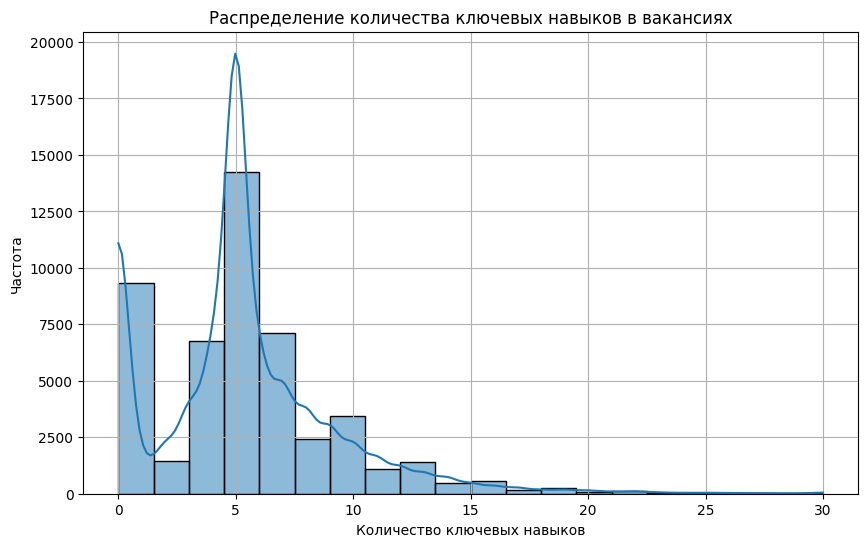

In [ ]:
### Вывод

import matplotlib.pyplot as plt
import seaborn as sns

# Построим график распределения количества навыков
plt.figure(figsize=(10, 6))
sns.histplot(df['key_skills_count'], bins=20, kde=True)
plt.title('Распределение количества ключевых навыков в вакансиях')
plt.xlabel('Количество ключевых навыков')
plt.ylabel('Частота')
plt.grid()
plt.show()

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в среднем указывают для каждого типа требуемого опыта (уникальное значение из поля `experience`).

    При решении задачи примите во внимание следующее:
    1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
    2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
    3. Если в расчётах участвует `null`, в результате он тоже даст `null` (посмотрите, что возвращает запрос `select 1 + null`). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит `null` на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

    Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до **целого числа**.

Error executing query: sqlalchemy.cyextension.immutabledict.immutabledict is not a sequence

Выводы по средней заработной плате в зависимости от опыта работы можно увидеть в таблице и награфике ниже:
           experience  avg_salary
0           Нет опыта     74643.0
1  От 1 года до 3 лет    139675.0
2       От 3 до 6 лет    243115.0


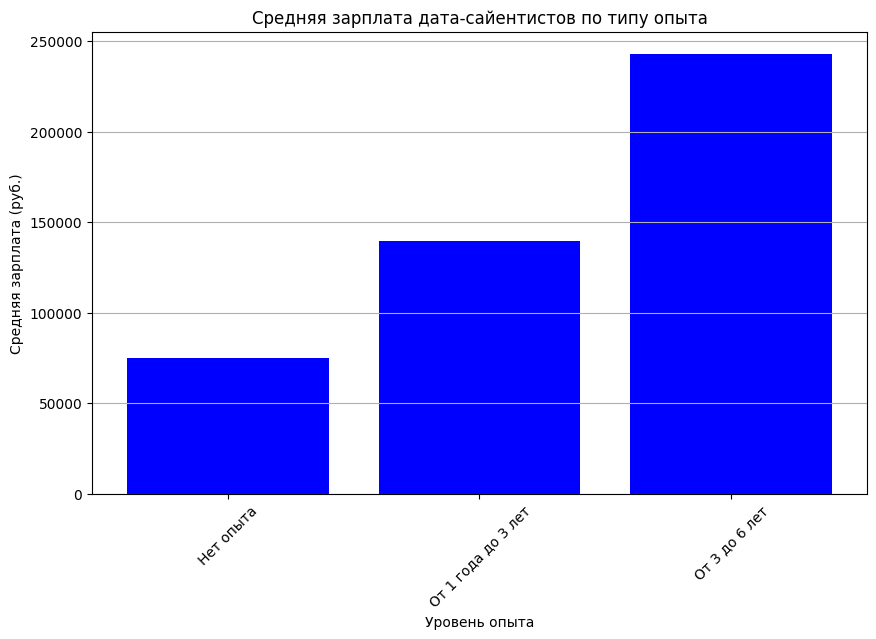

In [ ]:
# SQL-запрос для получения средней зарплаты по типу опыта для вакансий дата-сайентистов
query = """
    SELECT experience,
           ROUND(AVG((COALESCE(salary_from, 0) + COALESCE(salary_to, 0)) /
           NULLIF((CASE WHEN salary_from IS NOT NULL AND salary_to IS NOT NULL THEN 2 ELSE 1 END)))::int) AS avg_salary
    FROM public.vacancies
    WHERE (LOWER(name) LIKE '%data scientist%'
   OR LOWER(name) LIKE '%data science%'
   OR LOWER(name) LIKE '%исследователь данных%'
   OR (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%')
   OR LOWER(name) LIKE '%machine learning%'
   OR LOWER(name) LIKE '%машинн%обучен%')
   AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
    GROUP BY experience
    ORDER BY experience;
"""

# Выполнение запроса и преобразование результата в DataFrame
try:
    df_salary = pd.read_sql_query(query, engine)
except Exception as e:
    print(f"Error executing query: {e}")

# Проверяем, есть ли данные в df_salary перед выводом
if not df_salary.empty:
    # Вывод результатов на печать в цифровом и текстовом виде
    print()
    print("Выводы по средней заработной плате в зависимости от опыта работы можно увидеть в таблице и награфике ниже:")
    print(df_salary)

    # Визуализация данных
    plt.figure(figsize=(10, 6))
    plt.bar(df_salary['experience'], df_salary['avg_salary'], color='blue')
    plt.title('Средняя зарплата дата-сайентистов по типу опыта')
    plt.xlabel('Уровень опыта')
    plt.ylabel('Средняя зарплата (руб.)')
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Показ графика
    plt.show()
else:
    print("Нет данных для отображения.")


В результате анализа средней заработной платы по уровню опыта получили следующие данные

***

## **ВЫВОДЫ по разделу 6. ПРЕДМЕТНЫЙ АНАЛИЗ**

6.1. В задании Рассмотрено сколько вакансий имеет отношение к исследованию данных.
Результат: Количество вакансий, имеющих отношение к данным: 1771
В данном случае мы рассматриваем вакансии, которые явно связаны с данными. Число 1771 вакансий указывает на наличие обширного рынка труда для специалистов в области данных, что создает хорошие возможности для соискателей. Это говорит о растущем интересе компаний к аналитике данных и искусственному интеллекту. Следует отметить, что многие вакансии могут покрывать широкий спектр ролей в компании, начиная от аналитиков данных до исследователей данных.

6.2. Определено сколько есть подходящих вакансий для начинающего дата-сайентиста.
Результат: Количество подходящих вакансий для начинающего дата-сайентиста: 51
Наличие всего 51 вакансии для начинающего дата-сайентиста, это говорит о высокой конкуренции на позиции начального уровня. Факторы, такие как требования работодателей к опыту и наличию определенных навыков, могут снижать количество вакансий, подходящих для новичков. Это также может подчеркивать необходимость дополнительных курсов или обучения для соискателей, заинтересованных в этой области.

6.3. Рассчитано сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или Postgres.
Результат: Количество вакансий для дата-сайентистов, в которых указан SQL или Postgres: 229
При наличии 229 вакансий с указанием SQL или Postgres как ключевых навыков, можно сделать вывод, что эти инструменты являются основополагающими для работы дата-сайентистов. Это подчеркивает важность знаний работы с базами данных, так как обработка и анализ данных часто требуют использования SQL.

6.4. Определено, насколько популярен Python в требованиях работодателей к DS.
Результат: Количество вакансий для дата-сайентистов, в которых указан Python: 357
При наличии 357 вакансий, которые требуют знания Python, очевидно, что этот язык программирования является стандартом для дата-сайентистов. Python широко используется в аналитике данных, машинном обучении и большинстве современных проектов, связанных с данными, что делает его необходимым навыком для соискателей.

6.5. Рассчитано сколько ключевых навыков в среднем указывают в вакансиях для DS?
Результат: Среднее количество ключевых навыков в вакансиях для дата-сайентистов: 6.41
Указание в среднем более 6 ключевых навыков в вакансиях предполагает высокие требования к соискателям. Это сигнализирует о том, что необходимо изучить самые востребованные ключевые навыки, чтобы быть конкурнетоспособным на рынке труда.

6.6. Создан запрос, позволяющий вычислить, какую зарплату для DS в среднем указывают для каждого типа требуемого опыта.

Результат:
1. Нет опыта: 74643.0
2. От 1 года до 3 лет: 139675.0
3. От 3 до 6 лет: 243115.0


##**Вывод: ** Рынок труда для дата-сайентистов демонстрирует высокий спрос и конкуренцию, особенно на начальных позициях. Важность SQL, Postgres и Python подчеркивает необходимость технических навыков, а среднее количество ключевых навыков в вакансиях требует от соискателей быть максимально подготовленными. Зарплаты варьируются в зависимости от опыта, что указывает на значительную перспективу карьерного роста в этой области.

# **Общий вывод по проекту**

В рамках данного проекта была проведена комплексная аналитика данных, связанная с вакансиями для специалистов в области данных, в частности, дата-сайентистов. Мы исследовали различные аспекты, включая количество вакансий, требования к навыкам, уровни опыта и средние зарплаты.


Основные результаты и выводы:

1. Общее количество вакансий: Анализ показал, что на рынке труда существует значительное количество вакансий, связанных с данными (1771), что указывает на высокий спрос на специалистов в этой области.
2. Требования для начинающих: Для новичков, желающих стать дата-сайентистами, доступно ограниченное количество вакансий (51), что подчеркивает необходимость дополнительного обучения и подготовки для успешного вхождения в профессию. Уровень зарплаты для новичков может быть снижен, например, в Краснодаре стажировки могут оплачиваться минимально или бесплатно для формирования портфолио.
3. Распределение навыков: SQL и Python оказались ключевыми навыками для успешной карьеры дата-сайентиста. Высокий спрос на эти навыки подтверждает их важность в профессии.
4. Ключевые навыки: Вакансии для дата-сайентистов в среднем требуют более 6 ключевых навыков, что указывает на необходимость комплексного набора компетенций, включая как технические, так и мягкие навыки.
5. Зарплатные ожидания: Средние зарплаты для дата-сайентистов увеличиваются с ростом опыта, особенно заметно на уровне от 1 до 3 лет. Это подчеркивает важность профессионального роста и накопления опыта для повышения зарплаты.

#*Дополнительные исследования данных:*
 Исследование соцсетей, новостей и сайтов поиска работы показывает, что на фоне экономической ситуации в России в 2025 году и в последующие годы рынок труда IT-специалистов, вероятно, будет характеризоваться сокращением количества вакансий. Это связано с экономической ситуацией в стране, которая приводит к оптимизации затрат и сокращению бюджетов компаний. В результате на рынке труда останутся в основном те специалисты, которые уже имеют стабильную работу и не попали под сокращение. Кроме того, востребованность будет сохраняться для тех, кто способен адаптироваться к новым задачам и технологиям, особенно в условиях все большей автоматизации процессов с помощью искусственного интеллекта (ИИ).

Искусственный интеллект становится ключевым фактором на рынке труда, способствуя автоматизации рутинных задач и изменению требований к специалистам. Специалисты, которые могут эффективно работать с ИИ-системами и адаптироваться к новым технологиям, будут иметь преимущество на рынке труда. Однако сокращение вакансий и повышение конкуренции среди соискателей создают сложные условия для начинающих специалистов, которые стремятся войти в эту область.

В целом, рынок труда IT-специалистов в России в 2025 году будет характеризоваться высокой конкуренцией и необходимостью постоянной адаптации к новым технологиям и задачам.
